In [1]:
import numpy as np
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

In [52]:
ckpt_folder = "../results/cifar100/resnet18/sgdm/01/ckpt"
D = 11220132   # number of params for resnet18
n = 391  # number of iterations per epoch

In [3]:
def get_param(ckpt_path):
    state_dict = torch.load(ckpt_path, map_location=torch.device('cpu'))
    param_dict = state_dict["model_state_dict"]
    P = []
    for k, v in param_dict.items():
        if ("weight" in k) or ("bias" in k):
            P.append(np.reshape(v.numpy(), (-1)))
    P = np.concatenate(P)
    return P

In [53]:
res = np.load("../results/param_pca.npz")
comp = res["comp"]
pred = res["pred"]

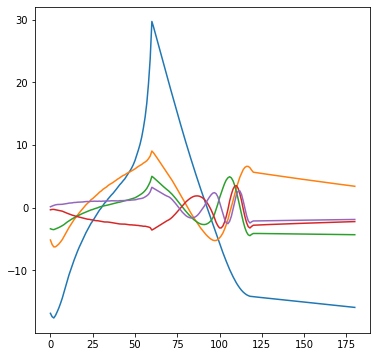

In [54]:
plt.figure(figsize=(6,6))
plt.plot(pred)
#plt.xlim([70,119])
#plt.savefig("top5comp_adap")
plt.show()

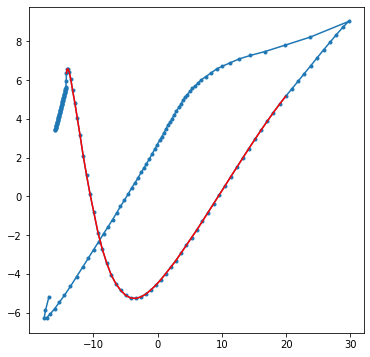

In [55]:
plt.figure(figsize=(6,6))
plt.plot(pred[:,0], pred[:,1], '.-')
plt.plot(pred[70:119,0], pred[70:119,1], 'r')
#plt.savefig("comp12diag_adap")
plt.show()

In [56]:
Pmean = np.zeros((D))
for i in tqdm(range(70,119)):
    P = get_param(ckpt_folder+"/step"+str(n*i)+".tar")
    Pmean += P
Pmean /= 49

100%|██████████| 49/49 [01:01<00:00,  1.26s/it]


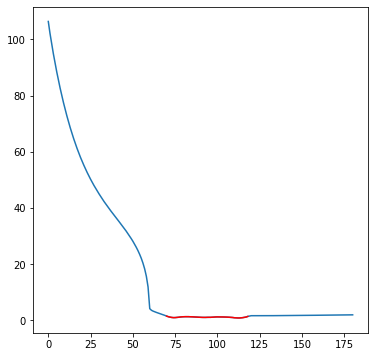

In [44]:
#dist = np.zeros((181))
#for i in tqdm(range(181)):
#    P = get_param(ckpt_folder+"/step"+str(n*i)+".tar")
#    P = P - Pmean
#    dist[i] = np.sqrt(np.sum((P - pred[i,0]*comp[0] - pred[i,1]*comp[1])**2))
plt.figure(figsize=(6,6))
plt.plot(dist)
plt.plot(range(70,119), dist[70:119], 'r')
#plt.savefig("dist_to_comp12_adap")
plt.show()

In [19]:
dist

array([110.48490192,  93.45775929,  80.53320225,  71.54634544,
        65.31657927,  61.08766103,  58.51096611,  57.07729749,
        56.5375607 ,  56.36588394,  56.31329721,  56.4608607 ,
        56.5174468 ,  56.67042598,  56.83644419,  56.97905806,
        57.10950062,  57.10551194,  57.12823928,  57.21876987,
        57.18453158,  57.23664472,  57.22986114,  57.124134  ,
        57.09378307,  56.82189882,  56.78540388,  56.74347506,
        56.57909357,  56.56587265,  56.3573184 ,  56.26899573,
        56.14079081,  55.73404455,  55.61614222,  55.41753058,
        55.14221915,  54.98530011,  54.76728525,  54.58187879,
        54.37065158,  54.1680978 ,  53.89207237,  53.62401447,
        53.24762993,  53.08065381,  52.73854319,  52.2129365 ,
        51.69429679,  51.21083943,  50.64294858,  50.21796078,
        49.34880531,  48.32108313,  47.0856224 ,  45.51411404,
        43.46927099,  40.75949046,  36.91643605,  30.57726567,
        16.39972705,  14.61445007,  13.2487851 ,  12.02

In [57]:
# get an orthogonal direction
ndirec = 5
pn = np.random.randn(D)
for i in range(ndirec):
    pn -= np.sum(pn*comp[i])/np.sum(comp[i]**2) * comp[i]
pn = pn / np.sqrt(np.sum(pn**2))

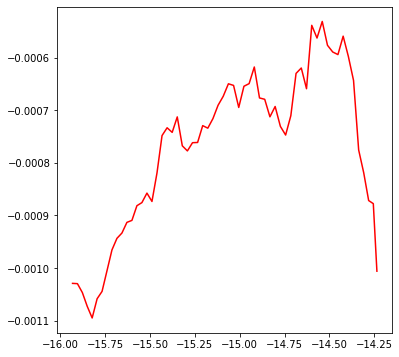

In [59]:
# draw the curve in comp[0]-pn space
#coord_pn = np.zeros((181))
#for i in tqdm(range(181)):
#    P = get_param(ckpt_folder+"/step"+str(n*i)+".tar")
#    P = P - Pmean
#    coord_pn[i] = np.sum(P*pn)
plt.figure(figsize=(6,6))
#plt.plot(pred[:,0], coord_pn)
plt.plot(pred[120:,0], coord_pn[120:],'r')
#plt.savefig("comp0_randomdir_adap.png")
plt.show()